## HW 7. Decision Trees 

1. Choose any dataset you want for binary classification with tabular data (it can be either a titanic or something more complex, but do not take pictures, texts, etc.), it is best to choose a dataset from Kaggle.
2. Make a basic EDA, write briefly a few conclusions that, in your opinion, will affect the model / model validation / metrics.
3. Describe your validation approach and metrics for this dataset.
4. Train and tune logistic regression (optimise the metric).
5. Do the same with a decision tree.
6. Visualize the decision tree and interpret the model (describe the most important features, whether the splits are logical, etc.)
7. If there is a test dataset, then make predictions on it and compare the result on lb with what you've got on validation (if there is no test dataset, then create it yourself, before training the model, separate 15-20% from the dataset and it will be your test). on the test, you run the model only once to find out the final result.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline


# EDA

In [4]:
train = pd.read_csv('/Users/dariyab/Desktop/projector/ML/Decision Trees /titanic/train.csv')
train.shape
train.head() 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Comment on missing values: 
#### Age has NaN
#### Name has a complication due to some nicknames 
#### Ticket has both numbers and letters 

## Feature descriptions: 
Categorical: Survived, Sex, and Embarked
Ordinal: Pclass 
Continous: Age, Fare. Discrete: SibSp, Parch.



## Characterization of numerical features

In [6]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Age range: infant - 80 y.o. Most passangers were between 25-34


## Characterization of categorical features

In [7]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
#Compare survival rates between men and women
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
#Compare survival rates between passanger classes 
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Visualization: 


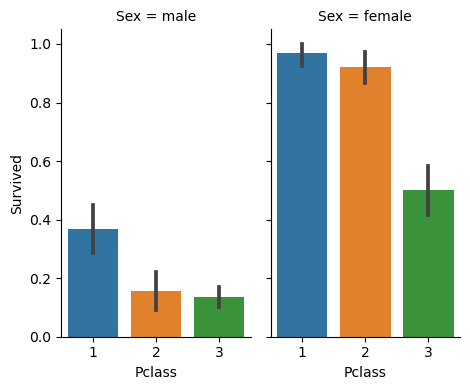

In [10]:
fig1 = sns.catplot(
    data=train, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4, aspect=.6,
)

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Some conclusions: 
Sex and Pclass could be good features to use for the prediction of survival. Females are more likely to survive than males. And first class is more likely to survive than 2nd class which is more likely to survive than third class.


### Validation approach and metrics
### The dataset is limited (few samples) and it's not balanced (a lot fewer survivors than non-survivors).
### Validation: we will stratify the data since it's an unbalanced dataset and can do a holdout (or if we have more time k-fold cross-validation). 
### Metrics: I will measure the accuracy of the classification and also the confusion matrix which will tell me precision and recall etc. 



## Training and tuning logistic regression:  


### Feature selection/Engineering 

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Selecting features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = train[features] #our features
y = train['Survived'] # the column we're trying to predict

In [14]:
#Filling missing values for some feature columns with the median of those columns. Robust to ouliers. 
X['Age'].fillna(X['Age'].median(), inplace = True) 
X['Fare'].fillna(X['Fare'].median(), inplace = True)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,28.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [15]:
#Encoding the categorical variable of "Sex" into 0s and 1s. #1 means the person was male

X = pd.get_dummies(X, columns =['Sex'], drop_first = True).astype(int)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22,1,0,7,1
1,1,38,1,0,71,0
2,3,26,0,0,7,0
3,1,35,1,0,53,0
4,3,35,0,0,8,1
...,...,...,...,...,...,...
886,2,27,0,0,13,1
887,1,19,0,0,30,0
888,3,28,1,2,23,0
889,1,26,0,0,30,1


## Data split, model training and evaluation

In [16]:
#Splitting the training set into train and test 

features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = X[features] #our features
y_train = train['Survived'] # the column we're trying to predict

In [17]:
#test dataset 
test = pd.read_csv('/Users/dariyab/Desktop/projector/ML/Decision Trees /titanic/test.csv')
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_test = test[features]
X_test['Age'].fillna(X_test['Age'].median(), inplace = True) 
X_test['Fare'].fillna(X_test['Fare'].median(), inplace = True)
X_test.head()
X_test = pd.get_dummies(X_test, columns = ['Sex'], drop_first = True).astype(int)
#reordering X_test columns so that they match X_train
X_test = X_test[X_train.columns]

In [18]:
from sklearn.model_selection import StratifiedKFold #because our data is unbalanced
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #for the evaluation

#StratifiedKFold 
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42) 

#Model 
model = LogisticRegression()

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty type
    'solver': ['liblinear', 'saga']        # Solver
}

best_hyperparams = None 
best_score = 0 

#Looping through each of the validation and train sets 

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)): 
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    #Hyperparameter tuning (not using GridSearch but just manually tuning for each of the folds)
    for C in param_grid['C']:
        for penalty in param_grid['penalty']: 
            for solver in param_grid['solver']: 

                model = LogisticRegression(C = C, penalty = penalty, solver = solver)
                model.fit(X_train_fold, y_train_fold)
                y_pred_fold = model.predict(X_val_fold)
                val_score = accuracy_score(y_val_fold, y_pred_fold)

                if val_score > best_score: 
                    best_score = val_score
                    best_hyperparams = {'C':C, 'penalty': penalty, 'solver': solver}

print("Accuracy:", best_score) 
print('Best hyperparameters:', best_hyperparams)



Accuracy: 0.8426966292134831
Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


### The accuracy score is great when you use the validation within each fold. Will run on the test set later and submit to Kaggle 

# Decision Tree

In [40]:
#tuning the decision tree model 
from sklearn.tree import DecisionTreeClassifier

#we already have the stratified k-fold from the model above 

#Model 
model = DecisionTreeClassifier()


# Define the hyperparameters grid
param_grid = {
    'max_depth': [1, 2, 3, 5],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 3, 7, 9, 11]
}


best_hyperparams = None
best_score = 0 

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)): 
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


#Hyperparameters 
    for max_depth in param_grid['max_depth']: 
        for min_samples_split in param_grid['min_samples_split']: 
            for min_samples_leaf in param_grid['min_samples_leaf']: 

                model = DecisionTreeClassifier(max_depth = max_depth, 
                                               min_samples_split = min_samples_split, 
                                               min_samples_leaf = min_samples_leaf) 

                model.fit(X_train_fold, y_train_fold)

                #Predict on validation fold
                y_pred_fold = model.predict(X_val_fold)
                val_score = accuracy_score(y_val_fold, y_pred_fold)

                if val_score > best_score: 
                    best_score = val_score 
                    best_hyperparams = {
                        'max_depth': max_depth, 
                        'min_samples_split': min_samples_split, 
                        'min_samples_leaf': min_samples_leaf
                    } 
                    
print('Best Accuracy: ', val_score) 
print('Best Hyperparameters: ', best_hyperparams) 


Best Accuracy:  0.8426966292134831
Best Hyperparameters:  {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2}


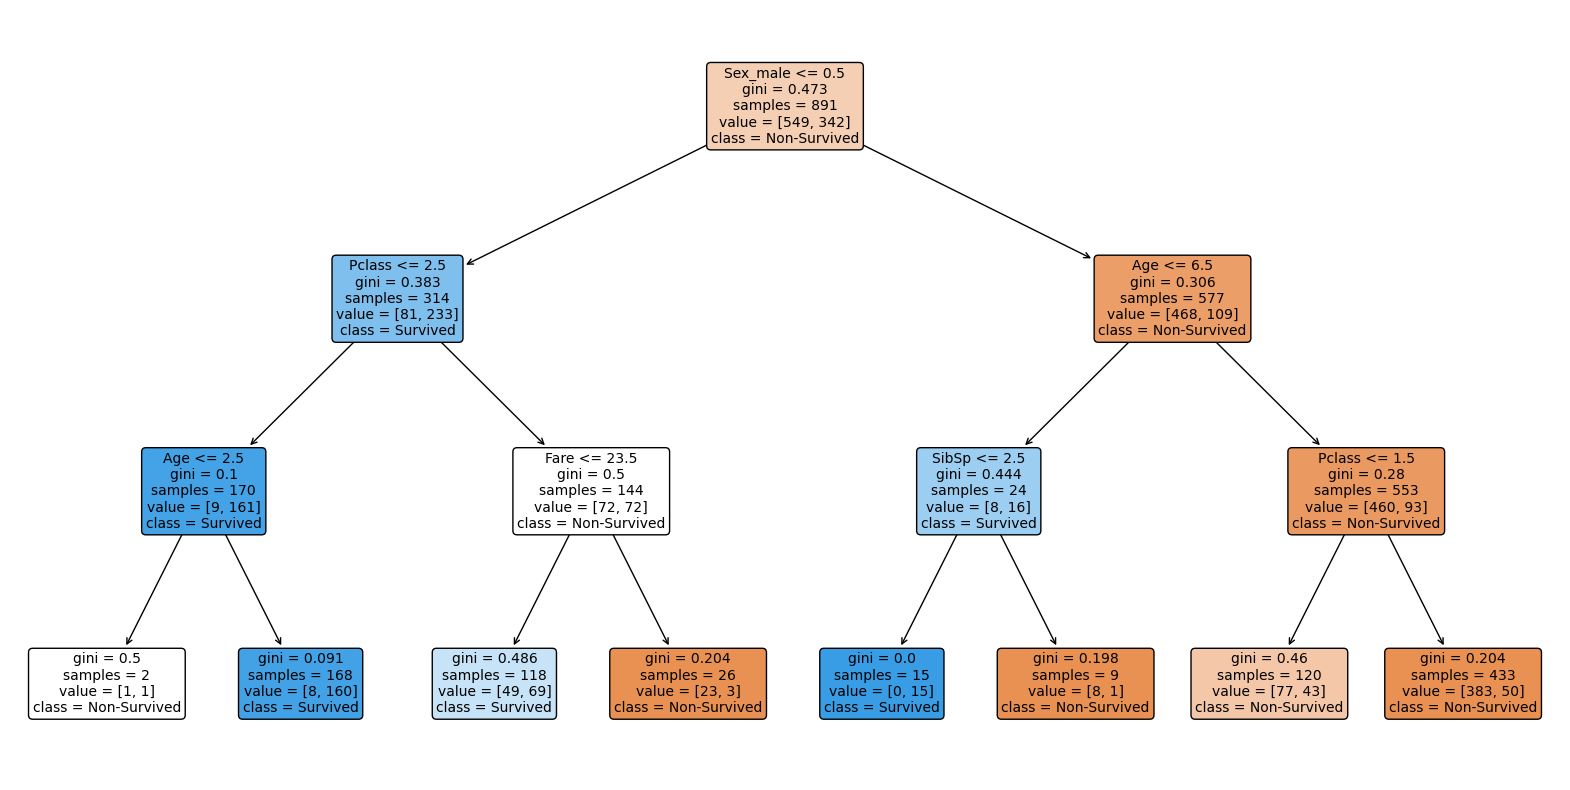

In [43]:
#Visualizing the decision tree model
#just showing the first three layers for readability but there are 10 layers in the model 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt #already imported above but just in case


best_model = DecisionTreeClassifier(max_depth=best_hyperparams['max_depth'], 
                                    min_samples_split=best_hyperparams['min_samples_split'], 
                                    min_samples_leaf=best_hyperparams['min_samples_leaf'])

best_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(best_model, 
          feature_names=X_train.columns,  # Display feature names
          class_names=['Non-Survived', 'Survived'],  # Replace with actual class names if available
          filled=True,  # Color the nodes
          rounded=True,  # Round the edges of the boxes
          fontsize=10)  # Adjust the font size for readability

plt.show()  # Show the plot

## The model first splits the features by Gender which makes sense because female passengers had a much higher likelihood of surviving. It then goes on to split by the passenger class and age. 

In [47]:
#Now let's test our best model on the test dataset: 
# Make predictions on the test data
predictions = best_model.predict(X_test)

# Prepare submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

### After submitting to Kaggle, my score for the best model was unfortunately only 77.2% on the test dataset 